# DRAG π/2 Pulse

In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import qutip as qt
import qctrlvisualizer as qv


class Simulator:
    def __init__(
        self,
        dimension: int = 2,
        sampling_period: float = 1.0,
        detuning: float = 0.0,
        anharmonicity: float = 0.0,
    ):
        self.dimension = dimension
        self.sampling_period = sampling_period
        self.detuning = detuning
        self.anharmonicity = anharmonicity

    def simulate(self, waveform: npt.NDArray[np.complex128]):
        samples = np.array(waveform, dtype=np.complex128)
        samples = np.append(samples, samples[-1])
        n_samples = len(samples)
        duraiton = (n_samples - 1) * self.sampling_period
        times = np.linspace(0.0, duraiton, n_samples)
        omega = 2 * np.pi * self.detuning
        alpha = 2 * np.pi * self.anharmonicity
        a = qt.destroy(self.dimension)
        ad = a.dag()
        hamiltonian = []
        hamiltonian.append(omega * ad * a)
        hamiltonian.append(0.5 * alpha * ad * ad * a * a)
        hamiltonian.append([0.5 * ad, samples])
        hamiltonian.append([0.5 * a, np.conj(samples)])
        initial_state = qt.basis(self.dimension, 0)
        result = qt.mesolve(
            hamiltonian,
            initial_state,
            times,
        )
        return result

    def plot_waveform(self, waveform: npt.NDArray[np.complex128]):
        samples = np.array(waveform, dtype=np.complex128)
        n_samples = len(samples)
        duraiton = n_samples * self.sampling_period
        times = np.linspace(0.0, duraiton, n_samples)
        plt.plot(times, np.real(samples), label="I")
        plt.plot(times, np.imag(samples), label="Q")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid()

    def display_bloch_sphere(self, result):
        states = np.array(result.states).squeeze()
        qv.display_bloch_sphere(states[:, :2])

    def plot_populations(self, result):
        states = np.array(result.states).squeeze()
        populations = np.abs(states) ** 2
        qv.plot_population_dynamics(
            sample_times=result.times,
            populations={
                rf"$|{k}\rangle$": populations[:, k] for k in range(self.dimension)
            },
        )

    def print_final_populations(self, result):
        states = np.array(result.states).squeeze()
        populations = np.abs(states[-1]) ** 2
        for k in range(self.dimension):
            print(f"|{k}> : {populations[k]:>6.2%}")

    def rect_pulse(
        self,
        duration: float,
        amplitude: float,
    ) -> npt.NDArray[np.complex128]:
        length = int(duration / self.sampling_period)
        t = np.linspace(0.0, duration, length)
        values = amplitude * np.ones_like(t, dtype=np.complex128)
        return values

    def gaussian_pulse(
        self,
        duration: float,
        amplitude: float,
    ) -> npt.NDArray[np.complex128]:
        length = int(duration / self.sampling_period)
        t = np.linspace(0.0, duration, length)
        sigma = duration / 6
        mu = duration / 2
        values = np.exp(-((t - mu) ** 2) / sigma**2)
        values = values / (np.sum(values) * self.sampling_period)
        values = amplitude * values
        return values

    def drag_pulse(
        self,
        duration: float,
        amplitude: float,
        factor: float,
    ) -> npt.NDArray[np.complex128]:
        length = int(duration / self.sampling_period)
        t = np.linspace(0.0, duration, length)
        sigma = duration / 6
        mu = duration / 2
        real = np.exp(-((t - mu) ** 2) / sigma**2)
        real = real / (np.sum(real) * self.sampling_period)
        real = amplitude * real
        alpha = 2 * np.pi * self.anharmonicity
        beta = -factor / alpha
        imag = beta * (mu - t) / sigma**2 * real
        return real + 1j * imag

In [2]:
simulator = Simulator(
    sampling_period=0.1,
    dimension=3,
    detuning=0.0,
    anharmonicity=-0.3,
)

In [3]:
rotation_angle = np.pi / 2
pulse_duration = 5
repeat_count = 8

## Gaussian

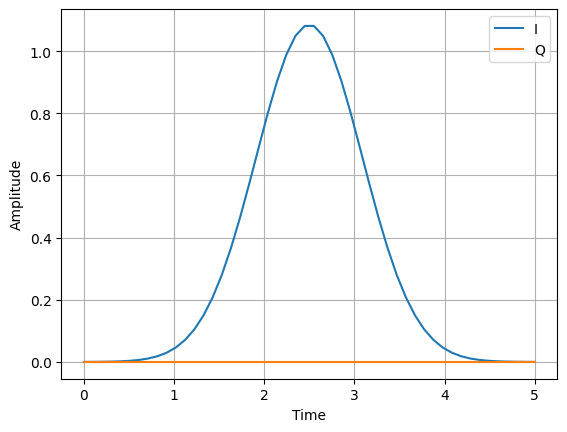

In [4]:
pulse = simulator.gaussian_pulse(
    duration=pulse_duration,
    amplitude=rotation_angle,
)
simulator.plot_waveform(pulse)

<IPython.core.display.Javascript object>

|0> : 53.01%
|1> : 40.84%
|2> :  6.15%


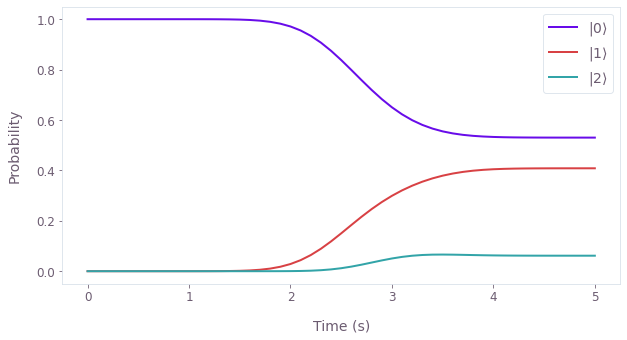

In [5]:
result = simulator.simulate(pulse)
simulator.display_bloch_sphere(result)
simulator.plot_populations(result)
simulator.print_final_populations(result)

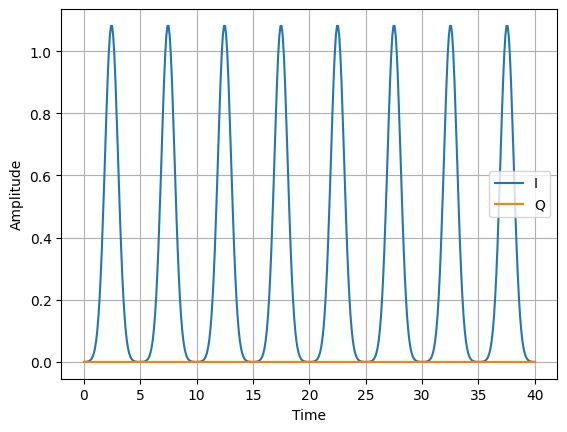

In [6]:
pulse_repeated = np.tile(pulse, repeat_count)
simulator.plot_waveform(pulse_repeated)

<IPython.core.display.Javascript object>

|0> : 96.33%
|1> :  2.79%
|2> :  0.88%


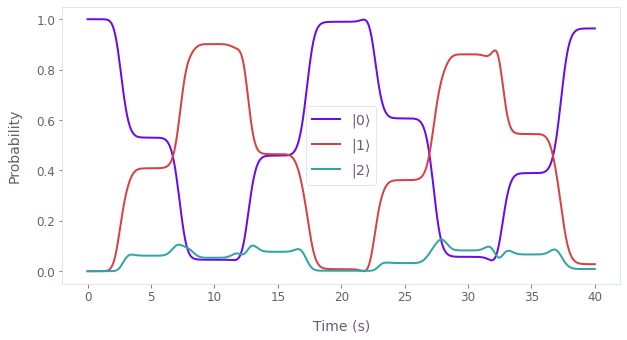

In [7]:
result = simulator.simulate(pulse_repeated)
simulator.display_bloch_sphere(result)
simulator.plot_populations(result)
simulator.print_final_populations(result)

## DRAG

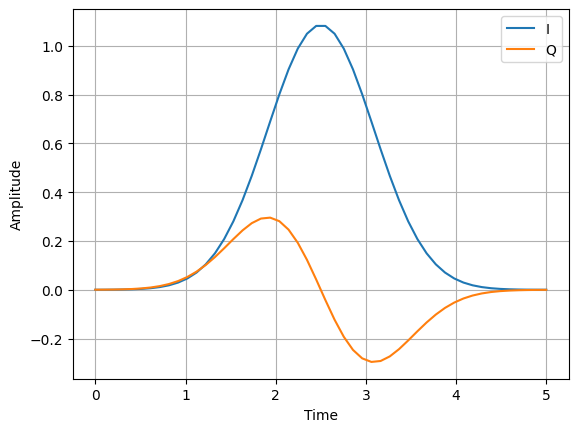

In [8]:
pulse = simulator.drag_pulse(
    duration=pulse_duration,
    amplitude=rotation_angle,
    factor=1,
)
simulator.plot_waveform(pulse)

<IPython.core.display.Javascript object>

|0> : 51.34%
|1> : 47.00%
|2> :  1.66%


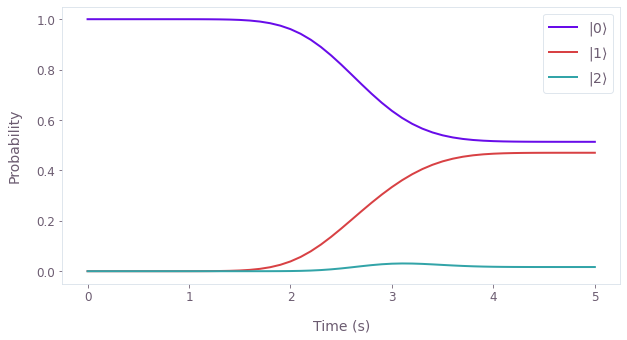

In [9]:
result = simulator.simulate(pulse)
simulator.display_bloch_sphere(result)
simulator.plot_populations(result)
simulator.print_final_populations(result)

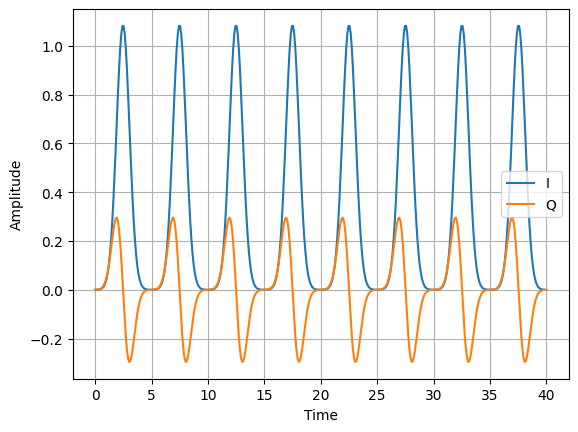

In [10]:
pulse_repeated = np.tile(pulse, repeat_count)
simulator.plot_waveform(pulse_repeated)

<IPython.core.display.Javascript object>

|0> : 97.39%
|1> :  2.03%
|2> :  0.58%


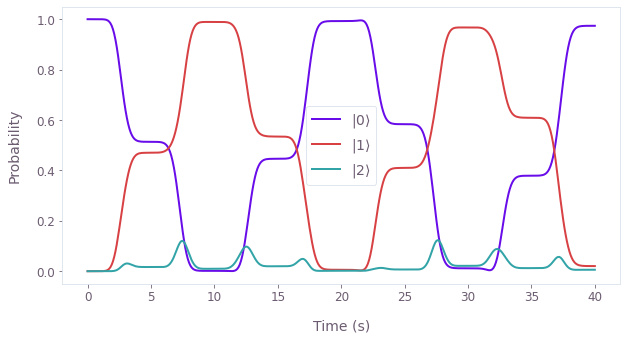

In [11]:
result = simulator.simulate(pulse_repeated)
simulator.display_bloch_sphere(result)
simulator.plot_populations(result)
simulator.print_final_populations(result)

## Half-DRAG

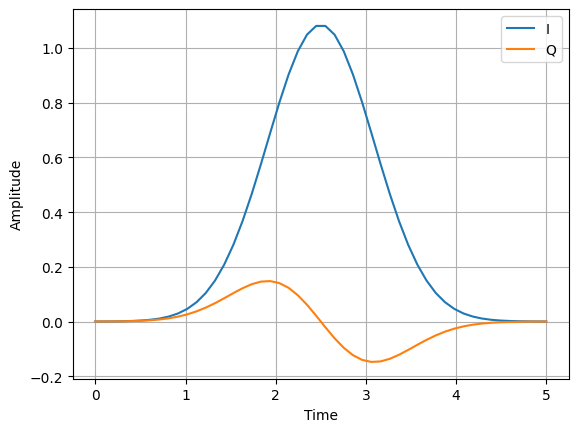

In [12]:
pulse = simulator.drag_pulse(
    duration=pulse_duration,
    amplitude=rotation_angle,
    factor=0.5,
)
simulator.plot_waveform(pulse)

<IPython.core.display.Javascript object>

|0> : 51.73%
|1> : 44.79%
|2> :  3.48%


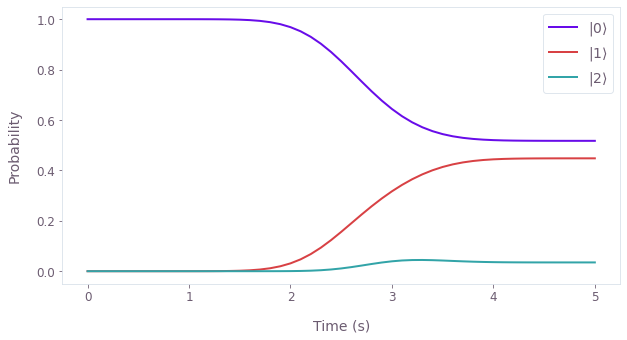

In [13]:
result = simulator.simulate(pulse)
simulator.display_bloch_sphere(result)
simulator.plot_populations(result)
simulator.print_final_populations(result)

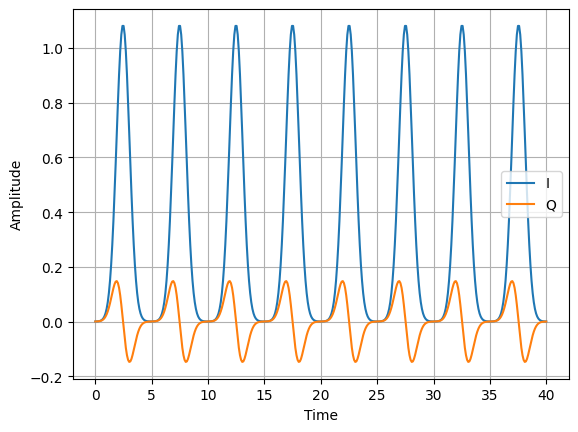

In [14]:
pulse_repeated = np.tile(pulse, repeat_count)
simulator.plot_waveform(pulse_repeated)

<IPython.core.display.Javascript object>

|0> : 96.91%
|1> :  2.38%
|2> :  0.72%


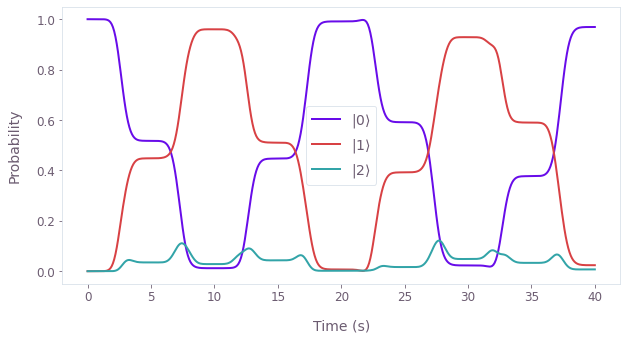

In [15]:
result = simulator.simulate(pulse_repeated)
simulator.display_bloch_sphere(result)
simulator.plot_populations(result)
simulator.print_final_populations(result)